## Determine correction Matrix to undistort markers

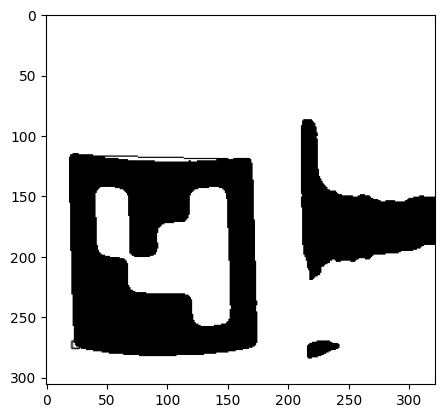

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

arucodict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_50)

image = cv2.imread('cup1.png', cv2.IMREAD_GRAYSCALE)
image = cv2.GaussianBlur(image, (5,5), 0)
_, image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

corners, ids, rejected = cv2.aruco.detectMarkers(image, arucodict)
image =  cv2.aruco.drawDetectedMarkers(image, corners, ids)
plt.imshow(image, cmap = 'gray')

In [36]:
# detect markers 
corners, ids, rejected = cv2.aruco.detectMarkers(image, arucodict)

# find marker in rejected contours
marker = []
for obj in rejected:
    ob=obj[0] 
    x = [ y[0] for y in ob]
    y = [ y[1] for y in ob]
    dx = max(x) - min(x)
    dy = max(y) - min(y)
    if dx/image.shape[0] > 0.3: 
        marker = ob
x_vals = [ y[0] for y in marker]
y_vals = [ y[1] for y in marker]

# find upper left corner
x_origin = image.shape[1]
for i,val in enumerate(x_vals):
    if val < x_origin and y_vals[i] < 0.8* max(y_vals):
        x_origin = val
        y_origin = y_vals[i]
x_origin = int(x_origin)
y_origin = int(y_origin)

# calculate offsets
offsets = []
for x in range(int(max(x_vals) - x_origin)): #loop over marker with
    # determine y-offset
    idx = x_origin + x
    val = image[ y_origin, idx]
    offset = 0
    rim = False
    if val == 255 and any(image[y_origin: int(max(y_vals)), idx]==0) :
        while rim == False:
            var = image[int(y_origin) + offset ,idx]
            if image[int(y_origin) + offset , idx] == 0:
                rim = True
            else:
                offset +=1
        offsets.append(offset)
    elif val == 0 and any(image[:,idx] == 255):
        while rim == False:
            var = image[int(y_origin) + offset , idx]
            if image[int(y_origin) + offset , idx] == 255:
                rim = True
            else:
                offset -=1
        offsets.append(offset)
    else:
        offsets.append(offset)

# plot results
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].imshow(image, cmap = 'gray')
ax[1].plot(offsets)


NameError: name 'y_origin' is not defined

## translate image column by offset

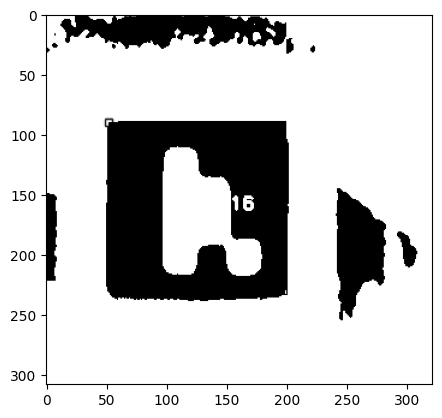

In [ ]:
for x in range(int(max(x_vals) - x_origin)):
    idx = x + x_origin
    if offsets[x] > 0:
        image[0: image.shape[0]- offsets[x], idx ] = image[offsets[x]:, idx]
    else:
        image[-offsets[x]:, idx] = image[0 :image.shape[0]+offsets[x], idx]


corners, ids, rejected = cv2.aruco.detectMarkers(image, arucodict)
image = cv2.aruco.drawDetectedMarkers(image, corners, ids)
plt.imshow(image, cmap= 'gray')

# Define function from algorithm above and test

1: [[29]]
2: [[35]]
3: [[38]]
4: [[37]]
5: [[36]]
6: [[30]]
7: [[49]]
8: [[48]]
9: [[47]]
10: [[42]]
11: [[8]]
12: [[32]]
13: [[15]]
14: [[7]]
15: [[24]]
16: [[16]]
17: [[9]]
18: [[18]]
success rate: 100.0 %


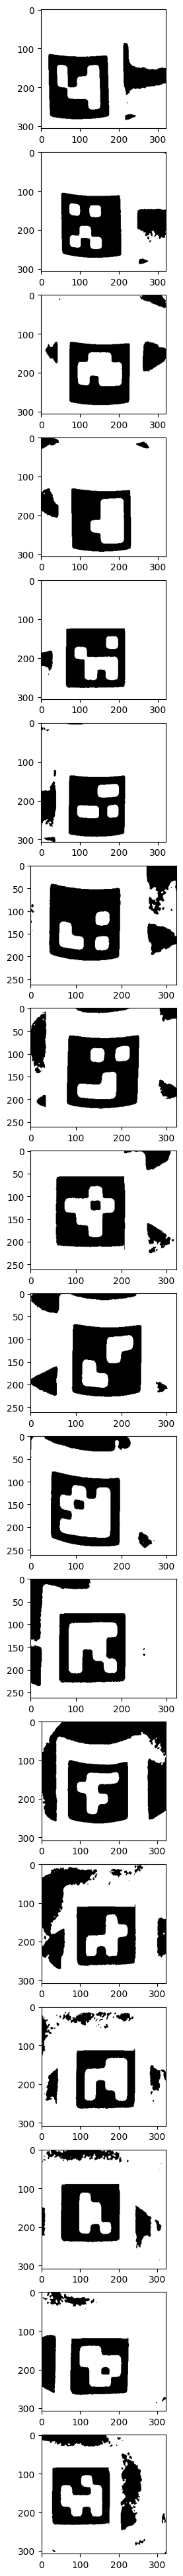

In [40]:
def undistort(image):
    # find marker in rejected contours
    arucodict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_50)
    corners, ids, rejected = cv2.aruco.detectMarkers(image, arucodict)
    if ids is not None: 
        image = np.array(image, dtype = np.uint8)
        return corners, ids, image
    marker = []
    for obj in rejected:
        ob=obj[0] 
        x = [ y[0] for y in ob]
        y = [ y[1] for y in ob]
        dx = max(x) - min(x)
        dy = max(y) - min(y)
        if dx/image.shape[0] > 0.3: 
            marker = ob
    x_vals = [ y[0] for y in marker]
    y_vals = [ y[1] for y in marker]

    # find upper left corner
    x_origin = image.shape[1]
    y_origin = 0
    for i,val in enumerate(x_vals):
        if val < x_origin and y_vals[i] < 0.8* max(y_vals):
            x_origin = val
            y_origin = y_vals[i]
    x_origin = int(x_origin)
    y_origin = int(y_origin)

    # calculate offsets
    offsets = []
    for x in range(int(max(x_vals) - x_origin)): #loop over marker with
        # determine y-offset
        idx = x_origin + x
        val = image[ y_origin, idx]
        offset = 0
        rim = False
        if val == 255 and any(image[y_origin: int(max(y_vals)), idx]==0) :
            while rim == False:
                var = image[int(y_origin) + offset ,idx]
                if image[int(y_origin) + offset , idx] == 0:
                    rim = True
                else:
                    offset +=1
            offsets.append(offset)
        elif val == 0 and any(image[:,idx] == 255):
            while rim == False:
                var = image[int(y_origin) + offset , idx]
                if image[int(y_origin) + offset , idx] == 255:
                    rim = True
                else:
                    offset -=1
            offsets.append(offset)
        else:
            offsets.append(offset)

    for x in range(int(max(x_vals) - x_origin)):
        idx = x + x_origin
        if offsets[x] > 0:
            image[0: image.shape[0]- offsets[x], idx ] = image[offsets[x]:, idx]
        else:
            image[-offsets[x]:, idx] = image[0 :image.shape[0]+offsets[x], idx]
    corners, ids, rejected = cv2.aruco.detectMarkers(image, arucodict)
    image = np.array(image, dtype=np.uint8)
    return corners, ids, image

counter = 0
images = []
fig, ax = plt.subplots(18, 1, figsize= (5, 50))
for i in range(18):
    image = cv2.imread(f'cup{i+1}.png', cv2.IMREAD_GRAYSCALE)
    if image is not None:
        corners, ids, image = undistort(image)
        images.append(image.copy())
        if ids is not None: counter += 1
        print(f"{i+1}: {ids}")

for i,image in enumerate(images):
    ax[i].imshow(image, cmap = 'gray')
    

print(f"success rate: {round(counter/18, 2)*100} %")
